In [95]:
import os 
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [96]:
app_data = 'application_data.csv'
prev_app_data = 'previous_application.csv'

In [97]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 300)

### **Loading Data**

In [98]:
df_app = pd.read_csv(app_data)
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [99]:
# check shape of data
df_app.shape

(307511, 122)

* There are 122 columns and 307511 rows of data.

In [100]:
# Check column data type
df_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

Data type of each column looks correct.

### **Choose column of interest**

There are 122 columns. In this section we are loading the datafame into a new dataframe with the column of out interest. We will perform analysis on new dataframe with column of our interest.

In [101]:
df_app.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

There are 122 columns. we have to identify the columns of our interest and then start our analysis.


Columns of interest are ----> 'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3'


In [102]:
# Loading dataframe with column of our interest. 
df1_app = df_app[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3']]
df1_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.311267,0.622246,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,NaN,0.555912,0.729567
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,NaN,0.322738,NaN


### **Analyse columns for missing value**

We will analyse the columns which has missing value and establish if it is MCAR, MAR, MNAR. We will list down method for handling such missing values.

In [103]:
df1_app.isna().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

1. Occupation Type of many people is missing. Need to check the reason for it.
2. OWN_CAR_AGE can have null value as people might not have cars. seems MNAR
3. CNT_FAM_MEMBERS has 2 missing value. Seems MCAR
4. NAME_TYPE_SUITE, AMT_GOODS_PRICE, AMT_ANNUITY need to check the reason for missing values.

In [104]:
# Get percetage value of missing data for all columns
round(df1_app.isna().sum() * 100 / len(df1_app), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F


* For columns with missing values- OCCUPATION_TYPE and OWN_CAR_AGE have considerable share(31 and 66 respectively). 
* Other columns with missing values has less 1% share and should not affect our analysis. 

In [105]:
# Check different gender code
df1_app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [106]:
# gender has XNA in it. We can drop those rows
df1_app = df1_app[df1_app.CODE_GENDER.isin(['M','F'])]

In [107]:
# Lets check different OCCUPATION_TYPE
df1_app.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [108]:
# Lets check what are NAME_INCOME_TYPE values where OCCUPATION_TYPE is missing.
df1_app[df1_app.OCCUPATION_TYPE.isna()]['NAME_INCOME_TYPE'].value_counts()

Pensioner               55357
Working                 24919
Commercial associate    12296
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

In [109]:
# Lets check what are NAME_INCOME_TYPE values where OCCUPATION_TYPE is present.
df1_app[df1_app.OCCUPATION_TYPE.isna() == False]['NAME_INCOME_TYPE'].value_counts()

Working                 133852
Commercial associate     59320
State servant            17916
Student                     13
Businessman                  8
Pensioner                    5
Maternity leave              4
Name: NAME_INCOME_TYPE, dtype: int64

* As NAME_INCOME_TYPE is similar for both missing and not missing OCCUPATION_TYPE, we can assume that there is no relationship between NAME_INCOME_TYPE and missingness in OCCUPATION_TYPE. 
* Occupation_TYPE is MCAR. AS it is more than 13% missing value, we can drop this column.
* NAME_INCOME_TYPE gives the same intution as OCCUPATION_TYPE.

In [110]:
# lets check OWN_CAR_AGE column
df1_app[df1_app.OWN_CAR_AGE.isna()]['FLAG_OWN_CAR'].value_counts()

N    202922
Y         5
Name: FLAG_OWN_CAR, dtype: int64


* There are only 5 records where the application own a cars but his car age is missing. Other are genuine missing value as they donot own a car.  This is very small value and will not impact our analysis.

In [111]:
# Check Organization Type
df1_app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

* Values in organization type are legitmate. No missing value found.

### **Checking for outliers**

We will check for the outliers in data and establish if they are legitmate data or outlier because of data collection errors. We will also drop the outliers where necessary.

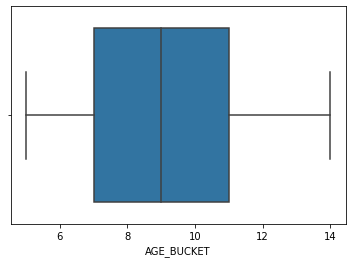

In [112]:
# Converting DAYS_BIRTH to Age Bucket. Each bucket is of size -  5 years .
df1_app['AGE'] = df1_app.DAYS_BIRTH.apply(lambda x : abs(x)/365)
df1_app['AGE_BUCKET'] = df1_app.AGE.apply(lambda x : math.ceil(x/5))
sns.boxplot(df1_app.AGE_BUCKET)
plt.show()
# Doesnot look to have outlier

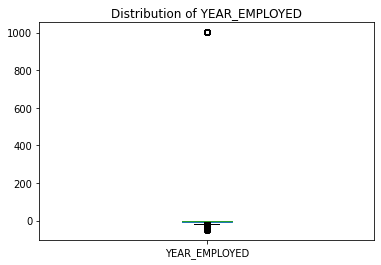

In [113]:
# Converting DAYS_EMPLOYED to YEAR and BUCKET it
df1_app['YEAR_EMPLOYED'] = df1_app.DAYS_EMPLOYED.apply(lambda x: math.floor(x/365) if x < 0 else math.ceil(x/365))
plt.title('Distribution of YEAR_EMPLOYED')
df1_app.YEAR_EMPLOYED.plot(kind='box')
plt.show()
# There are outlier. With the value of outlier, it appers to be a data collection issue. Need to drop such records.

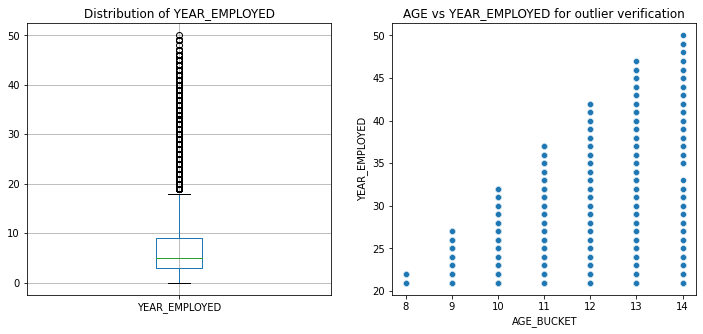

In [114]:
fig = plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
df1_app.drop(index = df1_app[df1_app.YEAR_EMPLOYED > 200].index , inplace=True)
df1_app['YEAR_EMPLOYED'] = abs(df1_app['YEAR_EMPLOYED'])
plt.title('Distribution of YEAR_EMPLOYED')
df1_app.YEAR_EMPLOYED.plot(kind='box')
plt.grid(True)

plt.subplot(1,2,2)
plt.title('AGE vs YEAR_EMPLOYED for outlier verification')
sns.scatterplot(data=df1_app[df1_app.YEAR_EMPLOYED > 20], y='YEAR_EMPLOYED', 
                x='AGE_BUCKET', )
plt.show()

* Mass of year employment lies in range 4-9 years. Also the box plot shows outlier values but these values are continous and looks legitmate as aged person has more year of experience. Hense it should be included in our analysis

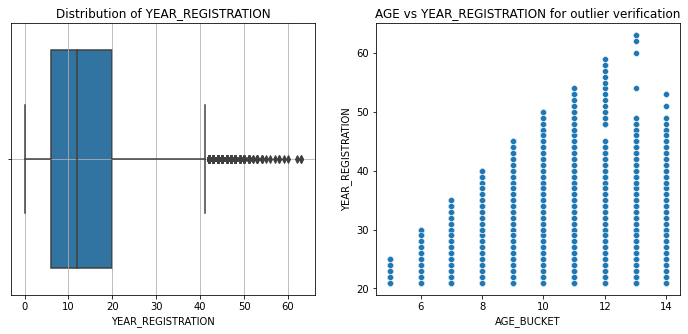

In [115]:
# Convert DAYS_REGISTRATION to YEAR_REGISTRATION 
fig = plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
df1_app['YEAR_REGISTRATION'] = df1_app.DAYS_REGISTRATION.apply(lambda x: 
                                     math.floor(x/365) if x < 0 else 
                                     math.ceil(x/365))
df1_app['YEAR_REGISTRATION'] = abs(df1_app['YEAR_REGISTRATION'])
plt.title('Distribution of YEAR_REGISTRATION')
sns.boxplot(data=df1_app, x='YEAR_REGISTRATION')
plt.grid(True)

plt.subplot(1,2,2)
plt.title('AGE vs YEAR_REGISTRATION for outlier verification')
sns.scatterplot(data=df1_app[df1_app.YEAR_REGISTRATION > 20], y=
                'YEAR_REGISTRATION', x='AGE_BUCKET', )
plt.show()

* Mass of year registration lies in range 6-20 years. Also the box plot shows outlier values but these values are continous and looks legitmate as aged person can get his doc registered earlier. Hense it should be included in our analysis

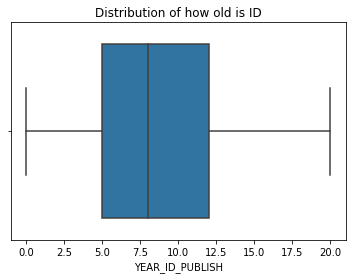

In [116]:
# Convert DAYS_ID_PUBLISH to YEAR_ID_PUBLISH
df1_app['YEAR_ID_PUBLISH'] = df1_app.DAYS_ID_PUBLISH.apply(lambda x: math.floor(x/365) if x < 0 else math.ceil(x/365))
df1_app['YEAR_ID_PUBLISH'] = abs(df1_app['YEAR_ID_PUBLISH'])
plt.title('Distribution of how old is ID')
sns.boxplot(data=df1_app, x='YEAR_ID_PUBLISH')
plt.show()
# Mass of id published lies in range 5 to 12 year old id. No outliers as such.

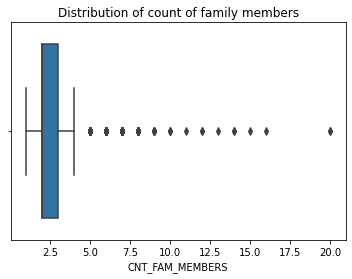

In [117]:
# Check CNT_FAM_MEMBERS
plt.title('Distribution of count of family members')
sns.boxplot(df1_app.CNT_FAM_MEMBERS)
plt.show()

* People with 9 family members can be considered as joint family. But above that are outliers and can be dropped from analysis.

In [118]:
df1_app = df1_app[df1_app.CNT_FAM_MEMBERS <= 9]

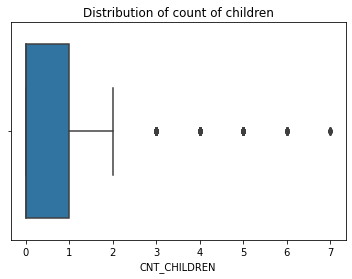

In [119]:
# Check CNT_CHILDREN
plt.title('Distribution of count of children')
sns.boxplot(df1_app.CNT_CHILDREN)
plt.show()
# The mass lies for 0 and 1 child. But there are outliers but these values seem to be legitmate. 

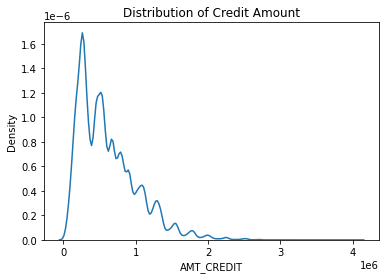

In [120]:
# Checking AMT_CREDIT
plt.title('Distribution of Credit Amount')
sns.distplot(df1_app.AMT_CREDIT, hist=False)
plt.show()

* Data is multi-modal and right skewed. Maximum people has requested for lower credit ammount.

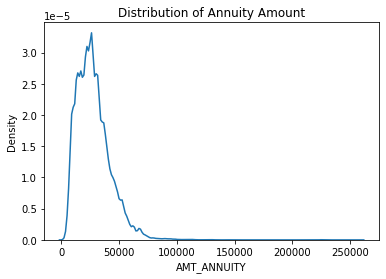

In [121]:
# Checking AMT_ANNUITY
plt.title('Distribution of Annuity Amount')
sns.distplot(df1_app.AMT_ANNUITY, hist=False)
plt.show()

* AMT_ANNUITY is right skewed. Mass of distribution is towards the lower value of Annuity.

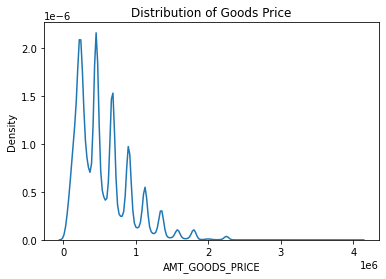

In [122]:
# Checking for AMT_GOODS_PRICE
plt.title('Distribution of Goods Price')
sns.distplot(df1_app.AMT_GOODS_PRICE, hist=False)
plt.show()

* This is a multi modal distribution. It seems there are particular goods/good's price for which loans are applied more.Also data is right skewed.

### **Perform Validation check on data**

We will perform sanity check to confirm the validity of data.

In [123]:
def isAgeValid(x):
  age = math.ceil(x.AGE)
  year_employed = abs(x.YEAR_EMPLOYED)
  year_reg = abs(x.YEAR_REGISTRATION)
  year_id_pub = abs(x.YEAR_ID_PUBLISH)

  if age <= year_employed or age < year_reg or age < year_id_pub:
    return False

  return True


In [124]:
# Age should be greater than YEAR_EMPLOYED, YEAR_REGISTRATION, YEAR_ID_PUBLISH
df1_app.apply(lambda x: isAgeValid(x), axis=1).value_counts()
# All records are correct as per AGE, YEAR_EMPLOYED, YEAR_REGISTRATION, YEAR_ID_PUBLISH

True    252118
dtype: int64

In [125]:
# Check if family member count is equal to or smaller than children count.
(df1_app.CNT_FAM_MEMBERS <= df1_app.CNT_CHILDREN).value_counts()

False    252118
dtype: int64

* Data has passed two sanity checks. We can move ahead with our analysis.

### **Know the customer we are serving**

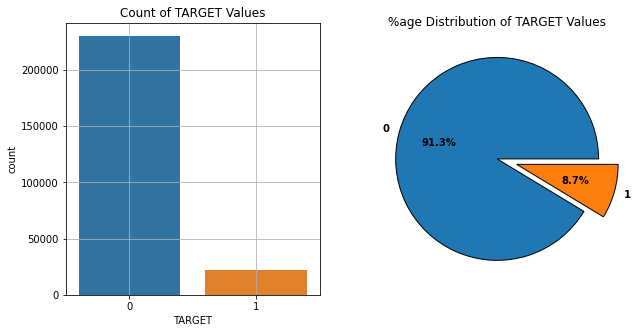

In [126]:
# check TARGET column
target_data=df1_app.TARGET.value_counts(normalize=True) * 100

fig = plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title('Count of TARGET Values')
sns.countplot(df1_app.TARGET)
plt.grid(True)

plt.subplot(1,2,2)
plt.pie(target_data, labels=target_data.index, autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'}, explode=[0, 0.2],
        textprops={'fontweight':"bold"})
plt.title('%age Distribution of TARGET Values')
plt.grid(True)
plt.show()
# Conclusion:-  Circa 9% of data is of client with payment difficulties

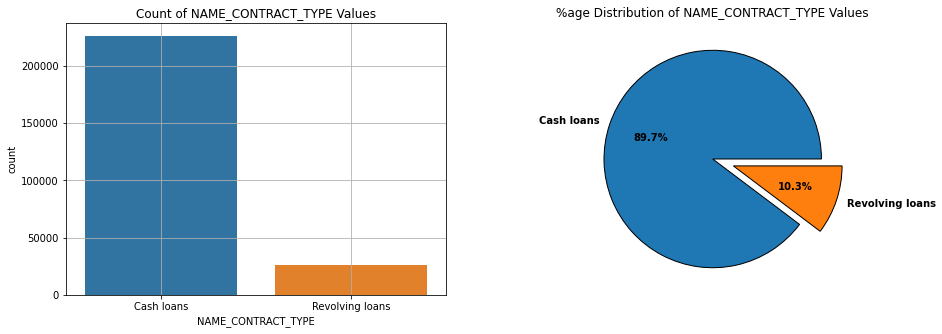

In [127]:
# check NAME_CONTRACT_TYPE
nct_data=df1_app.NAME_CONTRACT_TYPE.value_counts(normalize=True) * 100

fig = plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title('Count of NAME_CONTRACT_TYPE Values')
sns.countplot(df1_app.NAME_CONTRACT_TYPE)
plt.grid(True)

plt.subplot(1,2,2)
plt.pie(nct_data, labels=nct_data.index, autopct='%1.1f%%', 
        wedgeprops={'edgecolor':'black'},explode=[0, 0.2],
        textprops={'fontweight':"bold"})
plt.title('%age Distribution of NAME_CONTRACT_TYPE Values')
plt.grid(True)
plt.show()
# Conclusion:- Maximum data is of Cash loans. Revolving loans is only 10.3%

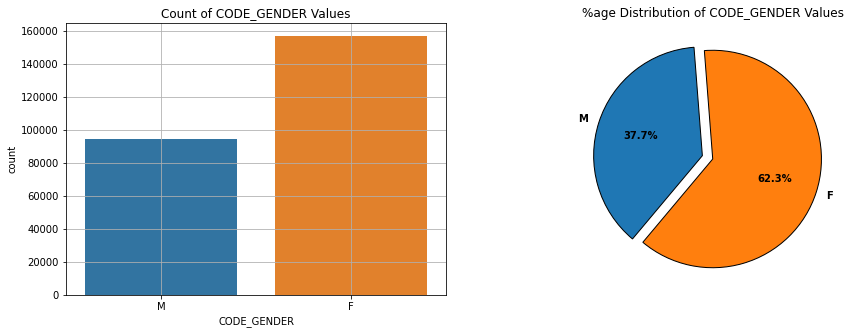

In [128]:
# Checking CODE_GENDER
gender_data=df1_app.CODE_GENDER.value_counts(normalize=True) * 100

fig = plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title('Count of CODE_GENDER Values')
sns.countplot(df1_app.CODE_GENDER)
plt.grid(True)

plt.subplot(1,2,2)
plt.pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', 
        wedgeprops={'edgecolor':'black'},explode=[0, 0.1],
        textprops={'fontweight':"bold"},colors=['C1','C0'],startangle=230)
plt.title('%age Distribution of CODE_GENDER Values')
plt.grid(True)
plt.show()
# Conclusion:- Twice Females as compared to Males.

In [129]:
# check AMT_INCOME_TOTAL
df1_app.AMT_INCOME_TOTAL.describe()

count    2.521180e+05
mean     1.759131e+05
std      2.588598e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [130]:
# Converting AMT_INCOME_TOTAL in unit 100,000 (hundred thousand)
df1_app['INCOME_HND_THND'] = df1_app.AMT_INCOME_TOTAL / 100000
df1_app.INCOME_HND_THND

0         2.025
1         2.700
2         0.675
3         1.350
4         1.215
          ...  
307504    1.530
307506    1.575
307508    1.530
307509    1.710
307510    1.575
Name: INCOME_HND_THND, Length: 252118, dtype: float64

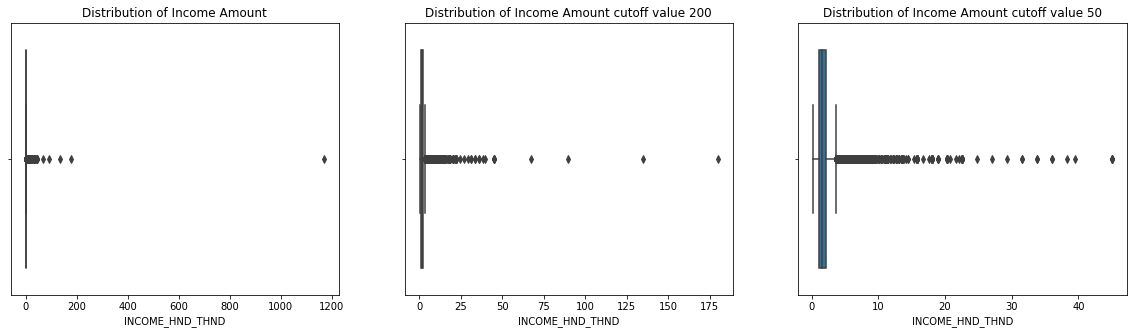

In [131]:
fig=plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt.title('Distribution of Income Amount')
sns.boxplot(data=df1_app, x='INCOME_HND_THND')

plt.subplot(1,3,2)
plt.title('Distribution of Income Amount cutoff value 200')
sns.boxplot(data=df1_app[ df1_app.INCOME_HND_THND < 200 ], x='INCOME_HND_THND')

plt.subplot(1,3,3)
plt.title('Distribution of Income Amount cutoff value 50')
sns.boxplot(data=df1_app[ df1_app.INCOME_HND_THND < 50 ], x='INCOME_HND_THND')
plt.show()
# Conclusion:- There are outliers in data that need to be removed.

In [132]:
df1_app[df1_app.INCOME_HND_THND >= 50].shape

(5, 48)

In [133]:
# Removig outliers on basis of AMT_INCOME_TOTAL
df1_app = df1_app[df1_app.INCOME_HND_THND < 50]

* Outliers are present as shown on boxplot. But As it is loan data, people with low income will have more need for loans. Hence the mass is at low income side.People with high-income may also take loans for inverstment etc. Such people may default payments if investment doesnot generate profit. Their data should be included for analysis. But as they are only 5 with high income, they are special cases and cannot be treated as general data.

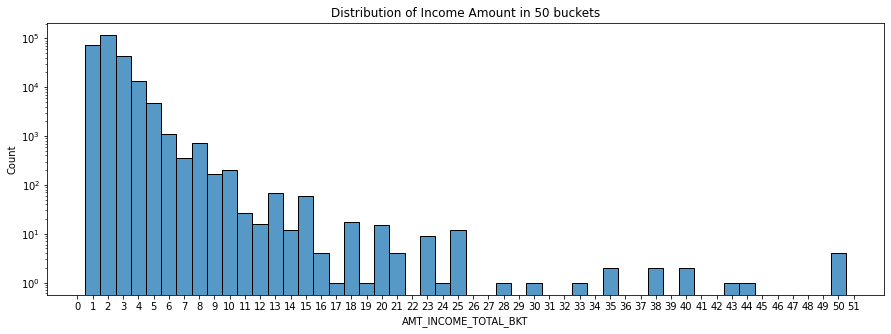

In [134]:
# bucketing the Income into 50 buckets
fig = plt.figure(figsize=[15,5])
df1_app['AMT_INCOME_TOTAL_BKT'] = pd.cut(df1_app.INCOME_HND_THND, bins=50, labels=range(1,51))
plt.title('Distribution of Income Amount in 50 buckets')
sns.histplot(data=df1_app, x='AMT_INCOME_TOTAL_BKT', bins=50)
plt.yscale(value='log')
plt.xticks(range(0,52))
plt.show()

In [135]:
(df1_app.AMT_INCOME_TOTAL_BKT <= 25).sum() / (df1_app.AMT_INCOME_TOTAL_BKT <= 25).count() 

0.9999405028697449

---
#### Some observable points are:- 

*   #### 90% of business is with cash loans
*   #### 2/3 of clients are female
*   #### 99% of clients have income less then equal to 25,00,000
*   #### 9% of clients have payment difficulties
---




### **Doc Vs Target relation**

In [136]:
# creating dataframe for document flags
doc_flag_col= ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_doc_flags = df_app[['SK_ID_CURR', 'TARGET']+ doc_flag_col]
df_doc_flags.head()

,SK_ID_CURR,TARGET,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
df_doc_count = pd.DataFrame({'TARGET0': df_doc_flags[df_doc_flags.TARGET==0][doc_flag_col].sum(),
                             'TARGET1': df_doc_flags[df_doc_flags.TARGET==1][doc_flag_col].sum()
                             })
df_doc_count.head()

,TARGET0,TARGET1
FLAG_DOCUMENT_2,9,4
FLAG_DOCUMENT_3,199028,19312
FLAG_DOCUMENT_4,25,0
FLAG_DOCUMENT_5,4276,372
FLAG_DOCUMENT_6,25571,1507


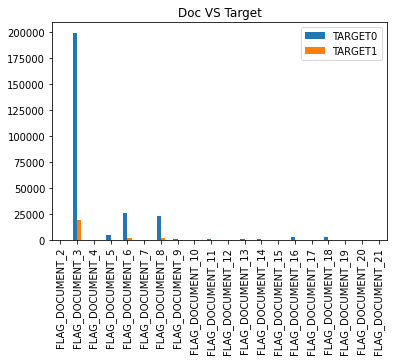

In [138]:
df_doc_count.plot(kind='bar', title='Doc VS Target')
plt.show()

* Doc 3, 6, 8 are most submitted by loan applicant.

### **Univariate Analysis**

In [139]:
def plotCount(data, count_col, title, facet_col='TARGET', facet_size=4, faces_aspect=1):
  g = sns.FacetGrid(data=data.sort_values(count_col), col=facet_col, size=facet_size, aspect=faces_aspect)
  g.map(sns.countplot, count_col)
  g.fig.suptitle(title, y=1.1)


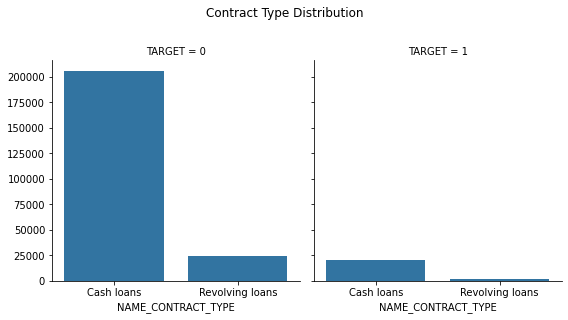

In [140]:
# Check contract type distribution
plotCount(df1_app, 'NAME_CONTRACT_TYPE', 'Contract Type Distribution')

* Cash loan has been prefered by customers both with and without payment diffculties.

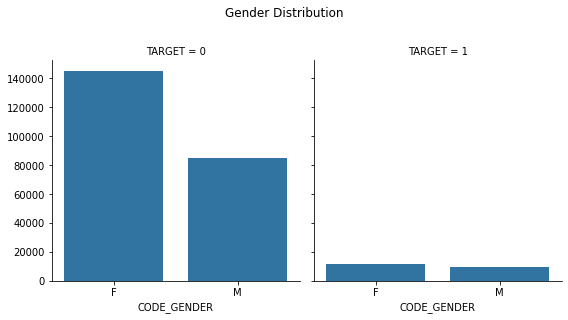

In [141]:
# Check gender distribution.
plotCount(df1_app.sort_values('CODE_GENDER'), 'CODE_GENDER', 'Gender Distribution')

* More number of female has take loan. Comparitively more males have payement issues.

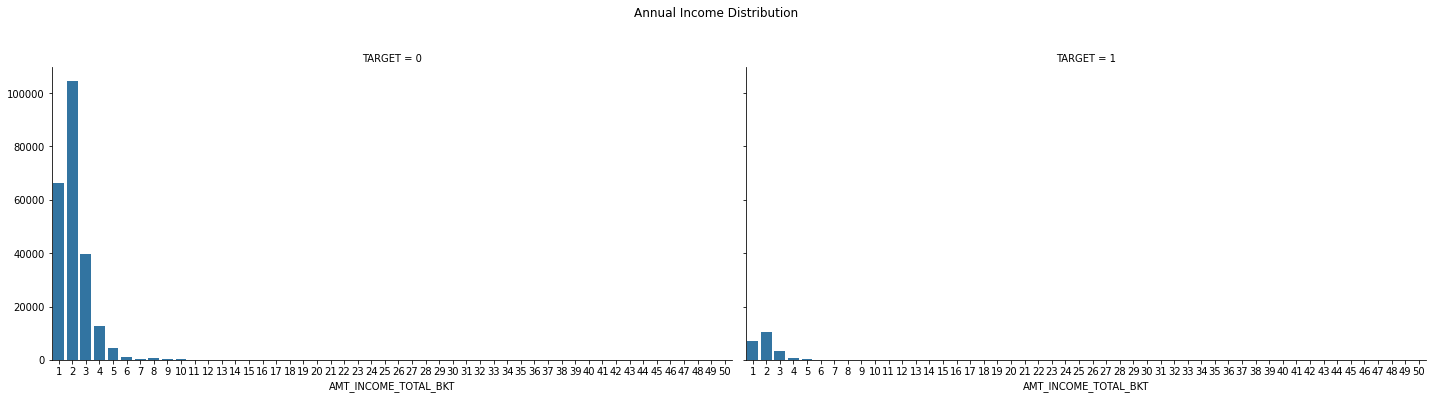

In [142]:
# Check Annual Income
plotCount(df1_app, 'AMT_INCOME_TOTAL_BKT', 'Annual Income Distribution', facet_size=5, faces_aspect=2)

* Most customers have income in 2nd bucket. Customers with low income have payment difficulties.

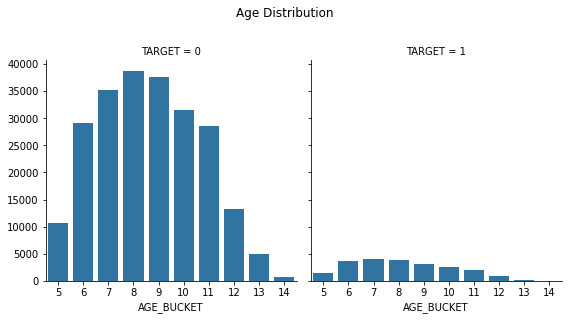

In [143]:
# Check Age
plotCount(df1_app, 'AGE_BUCKET', 'Age Distribution')

* Age column has same pattern for both target 0 and target 1 customer.

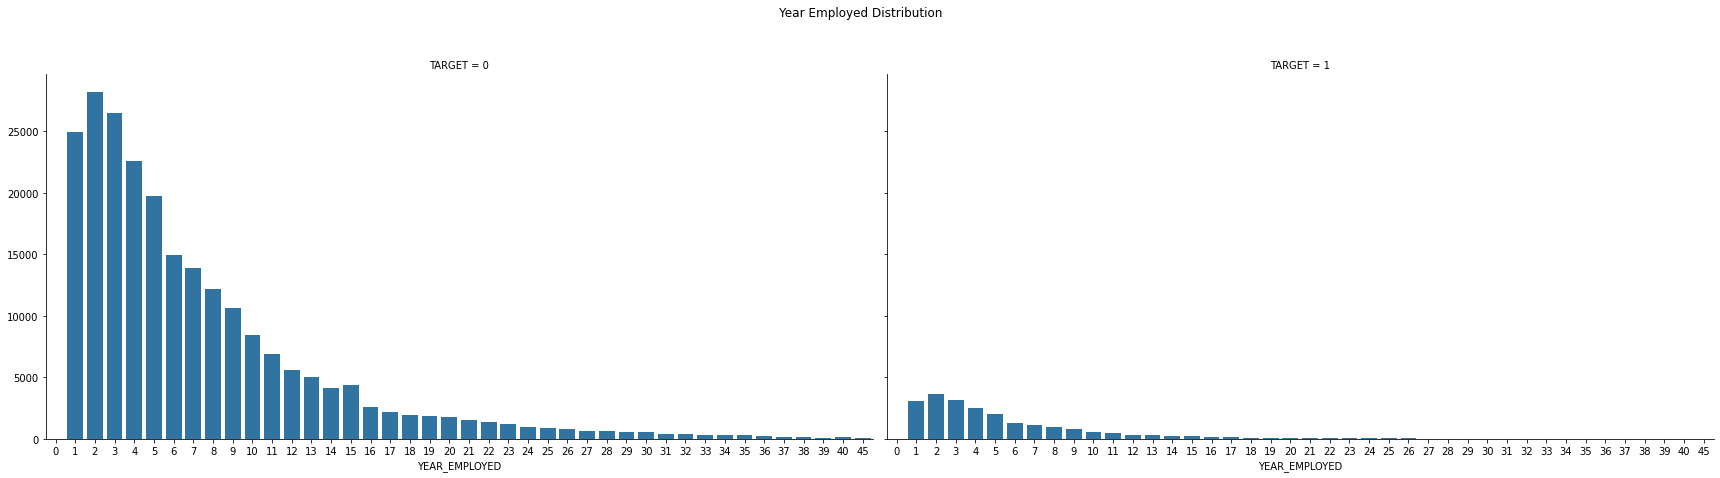

In [144]:
# Check Year Employeed
plotCount(df1_app, 'YEAR_EMPLOYED', 'Year Employed Distribution', facet_size=6, faces_aspect=2)

* Most customer has less year of employment. Pattern is same for target 0 and target 1.

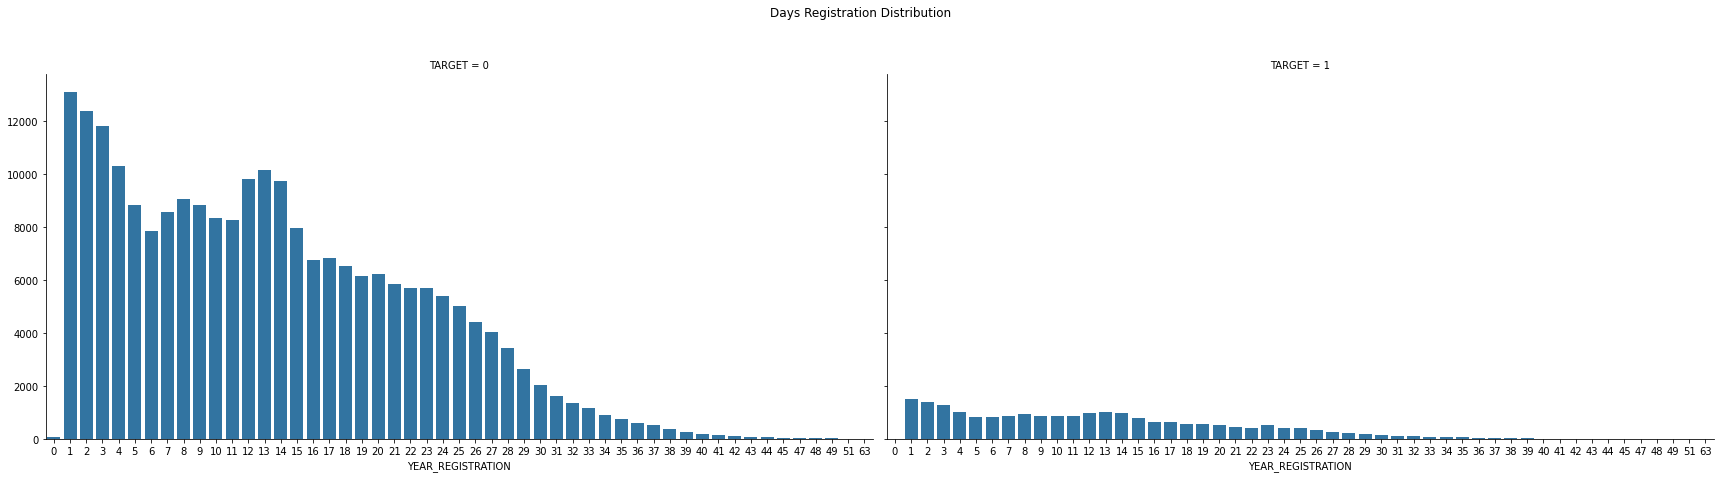

In [145]:
# Check Days Registration
plotCount(df1_app, 'YEAR_REGISTRATION', 'Days Registration Distribution', facet_size=6, faces_aspect=2)

* Days registration pattern is same for both target0 and target1 customer.

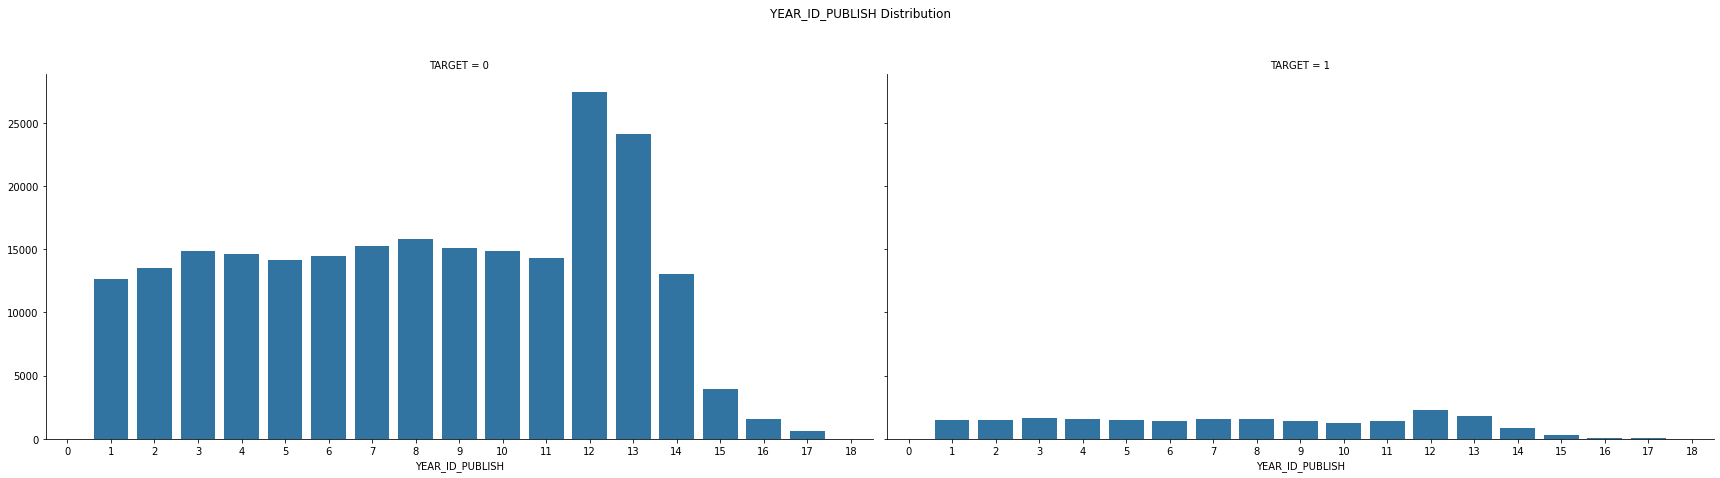

In [146]:
# Check YEAR_ID_PUBLISH 
plotCount(df1_app, 'YEAR_ID_PUBLISH', 'YEAR_ID_PUBLISH Distribution', facet_size=6, faces_aspect=2)

* YEAR_ID_PUBLISH pattern is same for both target0 and target1 customer.

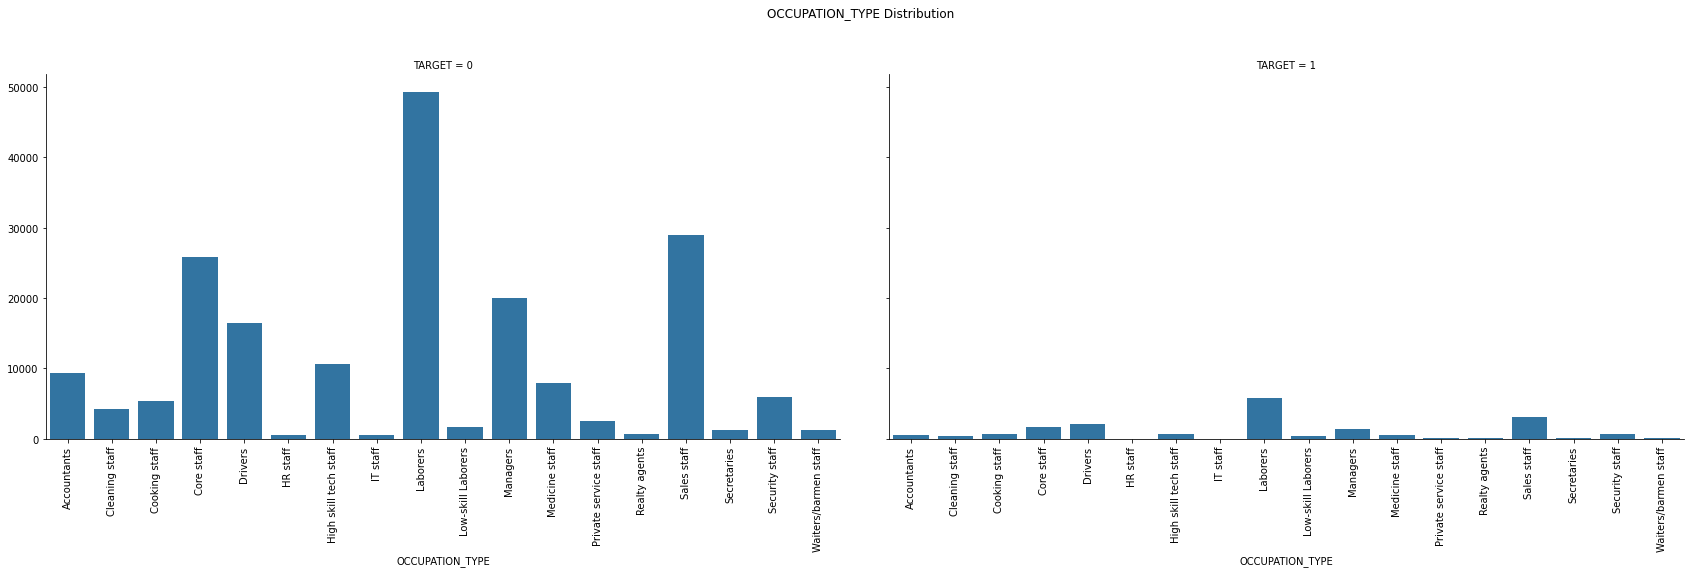

In [147]:
# Check OCCUPATION_TYPE
g = sns.FacetGrid(data=df1_app.sort_values('OCCUPATION_TYPE'), col='TARGET', size=6, aspect=2)
g.map(sns.countplot, 'OCCUPATION_TYPE')
g.fig.suptitle('OCCUPATION_TYPE Distribution', y=1.1)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

* Occupation type pattern is same for both target 0 and target 1.

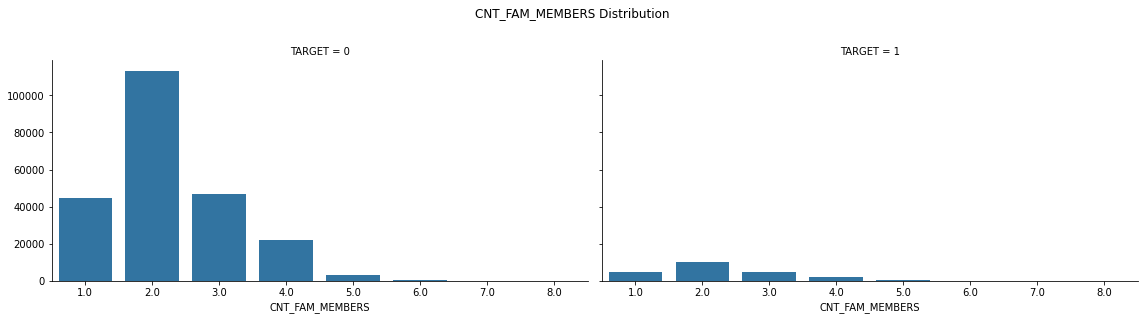

In [148]:
# Checking CNT_FAM_MEMBERS
plotCount(df1_app, 'CNT_FAM_MEMBERS', 'CNT_FAM_MEMBERS Distribution', facet_size=4, faces_aspect=2)

* Family Size Distribution pattern is same for both target 0 and target 1.
Very few people has family size 5 or greater. 
Most loan is taken by couple - Family size 2.

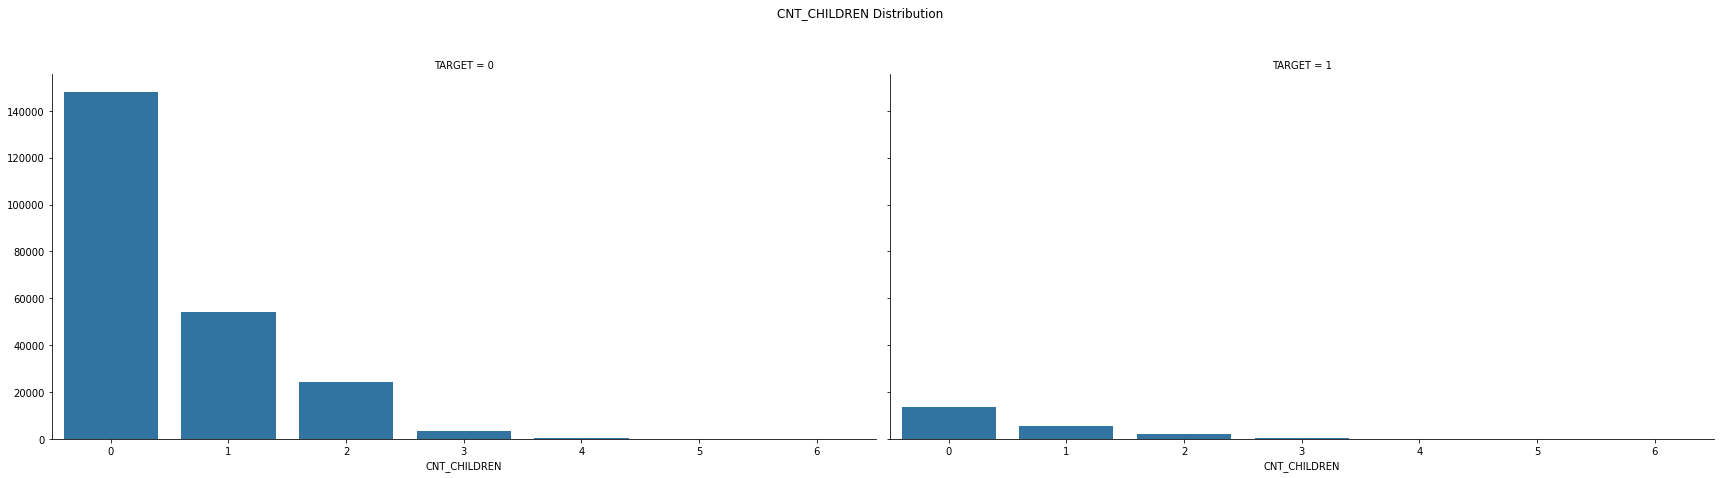

In [149]:
# Checking CNT_CHILDREN
plotCount(df1_app, 'CNT_CHILDREN', 'CNT_CHILDREN Distribution', facet_size=6, faces_aspect=2)

* Children count distribution pattern in same for both target 0 and target 1.

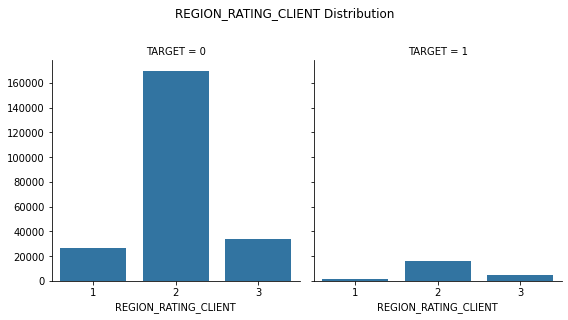

In [150]:
# Check REGION_RATING_CLIENT
plotCount(df1_app, 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT Distribution', facet_size=4, faces_aspect=1)

* More people from region 2 has taken loan. 
More Payment issues has been recorded in region 3(~ 12%)

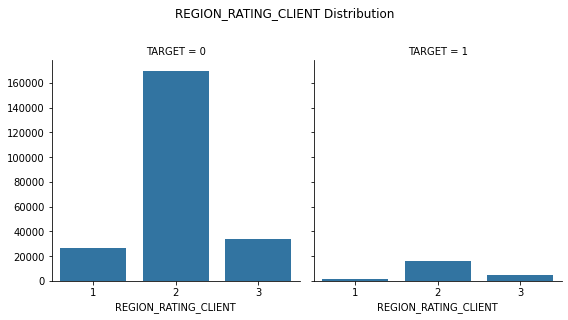

In [151]:
# Checking REGION_RATING_CLIENT_W_CITY
plotCount(df1_app, 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT Distribution', facet_size=4, faces_aspect=1)

* More people for region 2 has taken loan. 
More Payment issues has been recorded in region 3(~ 12%)

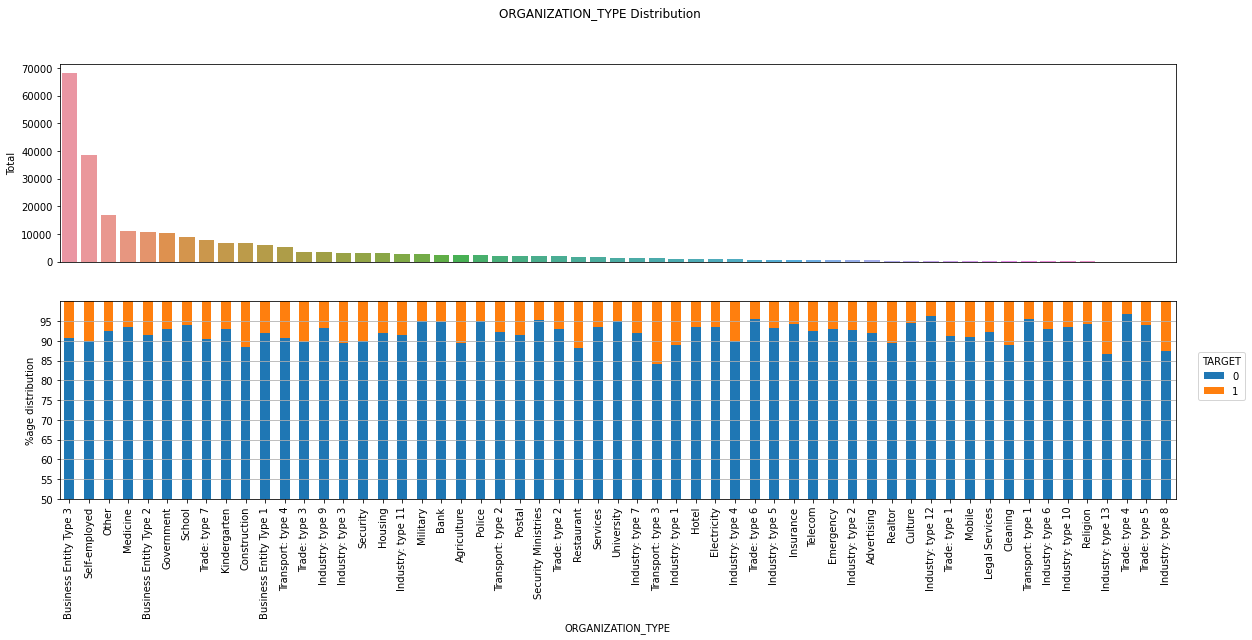

In [152]:
# Check Organization Type

fig = plt.figure(figsize=[20,8])
plt.suptitle('ORGANIZATION_TYPE Distribution')
bar_data = pd.pivot_table(data=df1_app, index='ORGANIZATION_TYPE', columns='TARGET', values='SK_ID_CURR', aggfunc='count')
bar_data['Total'] = bar_data.apply(lambda x: x.sum(), axis=1)
bar_data = bar_data.sort_values('Total', ascending=False)
plt.subplot(2,1,1)
sns.barplot(x=bar_data.index, y=bar_data.Total)
plt.xticks([])
plt.xlabel(None)


plt.subplot(2,1,2)
bar_data[[0,1]].apply(lambda x : x *100 /x.sum(), axis=1).plot(kind='bar', stacked=True, ax=plt.gca())
plt.legend(loc=[1.02, 0.5], title='TARGET')
myt1=plt.xticks(rotation=90)
plt.grid(axis='y')
plt.ylabel('%age distribution')
plt.ylim(50, 100)
plt.yticks(range(50,100,5))
plt.show()

* Top two Organization type from where maximum people has taken loan are Business Entity Type 3 and Self Employeed.
* Payment issues for above two business type is 10% almost.

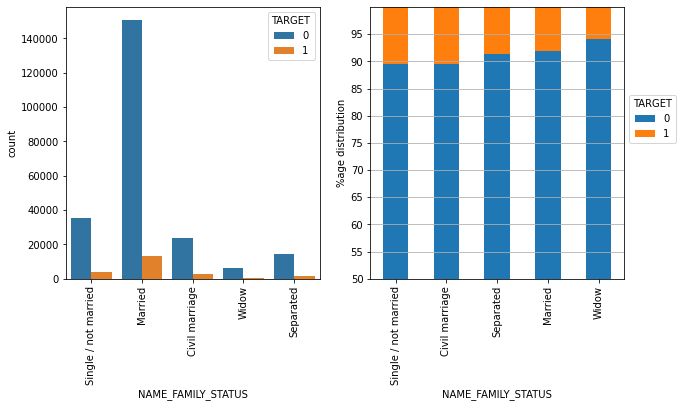

In [153]:
# Check Family Status
fig = plt.figure(figsize=[10,5])
ax1=plt.subplot(1,2,1)
sns.countplot(data=df1_app, x='NAME_FAMILY_STATUS' , hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
bar_data = pd.pivot_table(data=df1_app, index='NAME_FAMILY_STATUS', columns='TARGET', values='SK_ID_CURR', aggfunc='count')
bar_data[[0,1]].apply(lambda x : x *100 /x.sum(), axis=1).sort_values(1, ascending=False).plot(kind='bar', stacked=True, ax=plt.gca())
plt.legend(loc=[1.02, 0.5], title='TARGET')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.ylabel('%age distribution')
plt.ylim(50, 100)
plt.yticks(range(50,100,5))
plt.show()

* More number of Married people has taken loan. 
* Also payment issue with them are less.

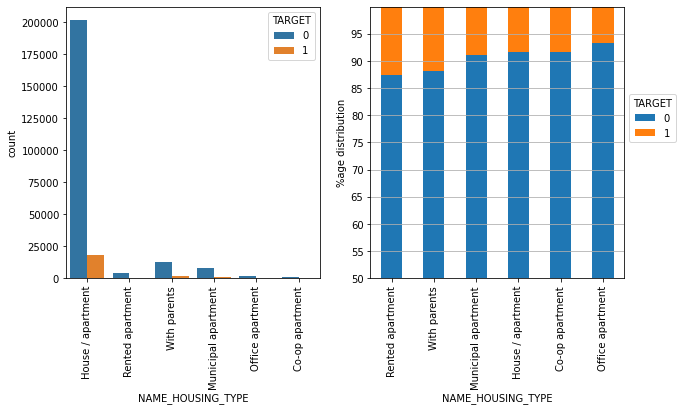

In [154]:
# Check Housing Type
fig = plt.figure(figsize=[10,5])
ax1 = plt.subplot(1,2,1)
sns.countplot(data=df1_app, x='NAME_HOUSING_TYPE' , hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
bar_data = pd.pivot_table(data=df1_app, index='NAME_HOUSING_TYPE', columns='TARGET', values='SK_ID_CURR', aggfunc='count')
bar_data[[0,1]].apply(lambda x : x *100 /x.sum(), axis=1).sort_values(1, ascending=False).plot(kind='bar', stacked=True, ax=plt.gca())
plt.legend(loc=[1.02, 0.5], title='TARGET')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.ylabel('%age distribution')
plt.ylim(50, 100)
plt.yticks(range(50,100,5))
plt.show()

* More number of people living in House/apartment has taken loan. Pattern is same for both target 0 and targrt 1 customer. Less than 10% of them has payment issue.

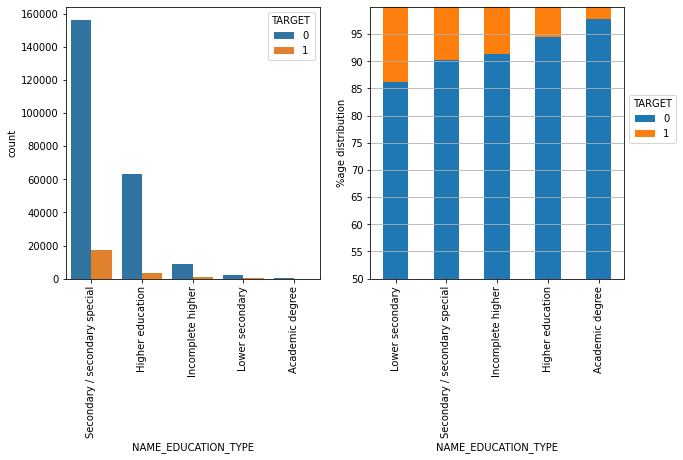

In [155]:
# checking NAME_EDUCATION_TYPE
fig = plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.countplot(data=df1_app, x='NAME_EDUCATION_TYPE' , hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
bar_data = pd.pivot_table(data=df1_app, index='NAME_EDUCATION_TYPE', columns='TARGET', values='SK_ID_CURR', aggfunc='count')
bar_data[[0,1]].apply(lambda x : x *100 /x.sum(), axis=1).sort_values(1, ascending=False).plot(kind='bar', stacked=True, ax=plt.gca())
plt.legend(loc=[1.02, 0.5], title='TARGET')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.ylabel('%age distribution')
plt.ylim(50, 100)
plt.yticks(range(50,100,5))
plt.show()

* Maximum Secondary education people has taken loan with 10% having payment issues.
Higher education has second highest no of loan taker with 6% having payment issues.

### **Multivariate Analysis**

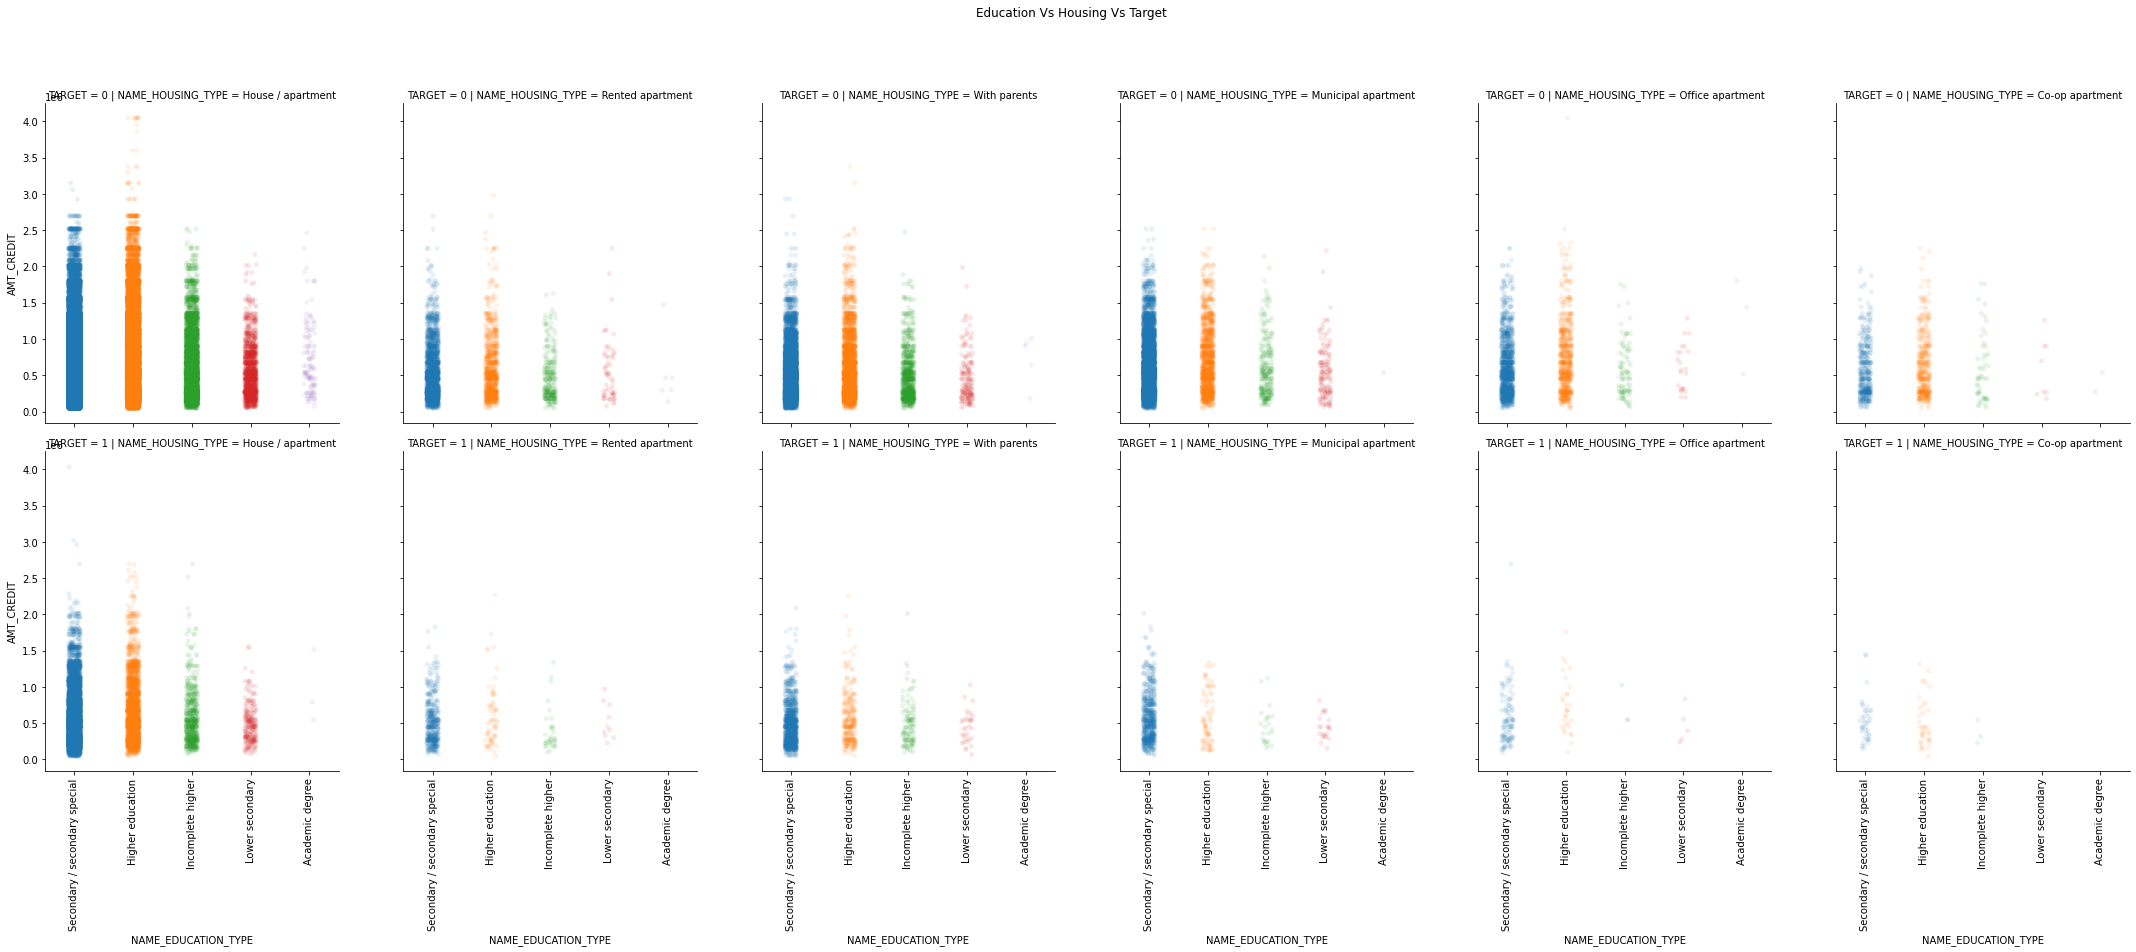

In [156]:
# check relation between Education, Housing and Target
g = sns.catplot(data=df1_app, x='NAME_EDUCATION_TYPE',  y='AMT_CREDIT', row='TARGET', col='NAME_HOUSING_TYPE', alpha=0.1)
g.fig.suptitle('Education Vs Housing Vs Target', y=1.1)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

* Amount credit is higher for higher education people followed by Secondary Education.
* Fewer people with education as Academic degree and lower secondary has taken loan.
* Our cusomter living preferences are House/Apart >  With Parents > Muncipal Apart > Rented Apart > office Apart > Co-op Apart
* For all segement for combination of Eduction type and Living preference, people without payment difficulties are more than those with difficulties.So, we are not able to conclude, which segment to avoid based on above segregation.

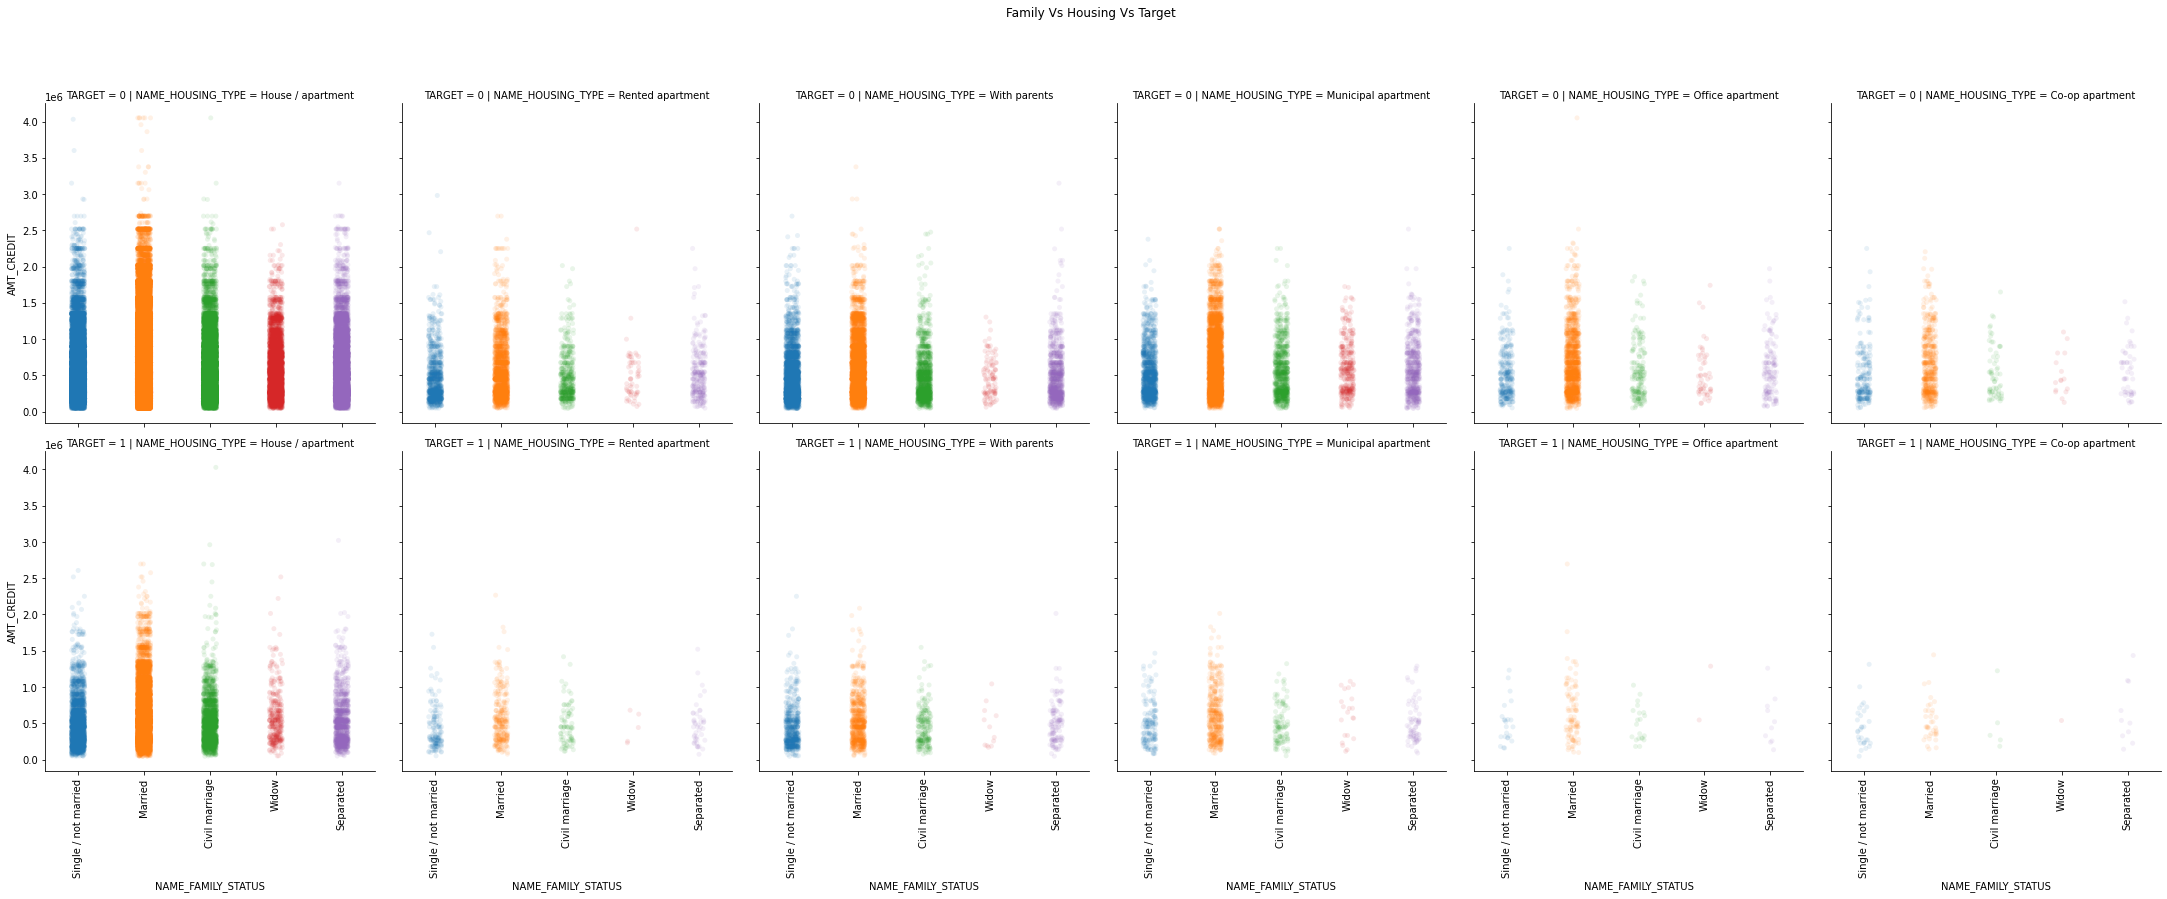

In [157]:
# check relation between Family status, Housing and Target
g = sns.catplot(data=df1_app, x='NAME_FAMILY_STATUS',  y='AMT_CREDIT', row='TARGET', col='NAME_HOUSING_TYPE', alpha=0.1)
g.fig.suptitle('Family Vs Housing Vs Target', y=1.1)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()


* Our Customers are mostly from House/Aprt living preferences. 
* Among them, married people has taken maximum amount credit.
* Over all married people are out major customer in all housing segment.
* The pattern is similar for both target - 0 as well as target-1. On this data,we cannot figure out which segment to avoid.

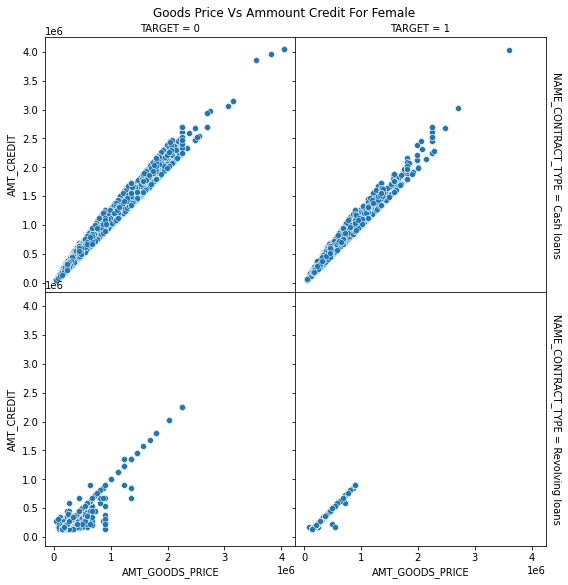

In [158]:
# Check realtion between good price Vs amount credit for each target and contract type combination.
g = sns.FacetGrid(df1_app[df1_app.CODE_GENDER == 'F'],col='TARGET', row='NAME_CONTRACT_TYPE', hue="CODE_GENDER", 
                  size=4, aspect=1, margin_titles=True, despine=False, subplot_kws = {'alpha':0.1})
g.map(sns.scatterplot, 'AMT_GOODS_PRICE', 'AMT_CREDIT')
g.set_axis_labels("AMT_GOODS_PRICE", "AMT_CREDIT")
g.fig.subplots_adjust(wspace=0, hspace=0)
g.fig.suptitle('Goods Price Vs Ammount Credit For Female', y=1.01)
plt.show()

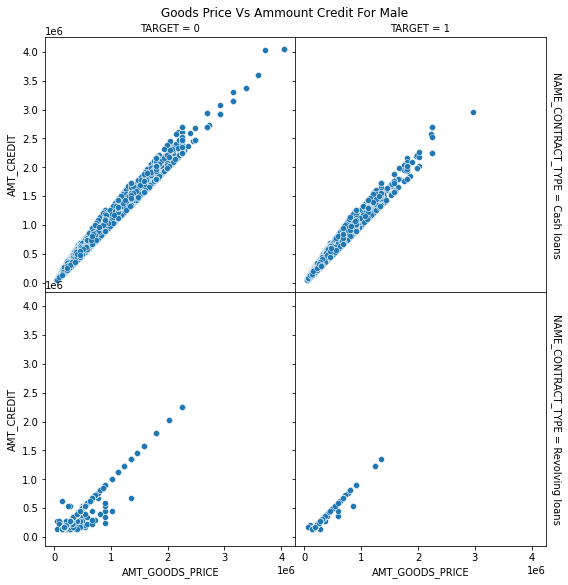

In [159]:
g = sns.FacetGrid(df1_app[df1_app.CODE_GENDER == 'M'],col='TARGET', row='NAME_CONTRACT_TYPE', hue="CODE_GENDER", 
                  size=4, aspect=1, margin_titles=True, despine=False, subplot_kws = {'alpha':0.1})
g.map(sns.scatterplot, 'AMT_GOODS_PRICE', 'AMT_CREDIT')
g.set_axis_labels("AMT_GOODS_PRICE", "AMT_CREDIT")
g.fig.subplots_adjust(wspace=0, hspace=0)
g.fig.suptitle('Goods Price Vs Ammount Credit For Male', y=1.01)
plt.show()

* Pattern is same in all 8 boxes. Decision cannot be taken on which segment to avoid

In [160]:
# Check linear correlation between numerical variables.
num_var = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

target0_corr_mat= abs(df1_app[df1_app.TARGET==0][num_var]).corr()
target1_corr_mat= abs(df1_app[df1_app.TARGET==1][num_var]).corr()

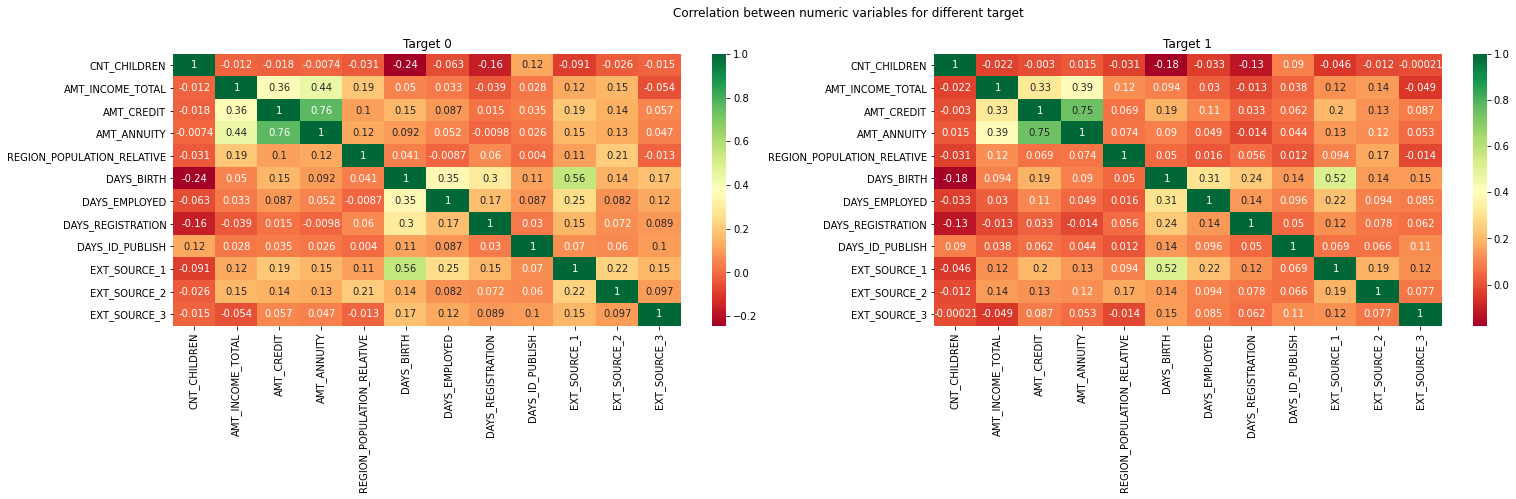

In [161]:
fig = plt.figure(figsize=[25, 5])
fig.suptitle('Correlation between numeric variables for different target', y=1.01)
ax1 = plt.subplot(1,2,1)
plt.title('Target 0')
sns.heatmap(target0_corr_mat, cmap="RdYlGn", annot=True, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Target 1')
sns.heatmap(target1_corr_mat, cmap="RdYlGn", annot=True,  ax=ax2)
plt.show()

* Amount Credit and Amount Annuity is positivly linearly corelated ->( ~0.8)
* Income Total and Amount Annuity is positivly linearly corelated -> (~ 0.4)
* Days Birth(Age) has positive correlation Ext_Source1 (~0.5)
* These correlations are same for both target 0 and target 1 customers.



### **Load Previous Application Data**

In [162]:
df_prev_app = pd.read_csv(prev_app_data)
df_prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
df_prev_app.shape

(1670214, 37)

In [164]:
# check null values (%age count)
nv_col_res = df_prev_app.isna().sum() * 100 / df_prev_app.shape[0]
nv_col_res

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [165]:
# find column name with > 13% null value and drop them from analysis.
df_prev_app.drop(columns=nv_col_res[nv_col_res > 13 ].index, inplace=True)

In [166]:
df_prev_app.isna().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [167]:
df_prev_app.applymap(lambda x: True if x == 'XNA' else False).sum() * 100 / df_prev_app.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.020716
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE         40.588691
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE              37.563091
CODE_REJECT_REASON              0.313972
NAME_CLIENT_TYPE                0.116213
NAME_GOODS_CATEGORY            56.927376
NAME_PORTFOLIO                 22.286366
NAME_PRODUCT_TYPE              63.684414
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY           51.234153
NAME_YIELD_GROUP               30.966990
PRODUCT_COMBINATION             0.000000
dtype: float64

In [168]:
df_prev_app.drop(index=df_prev_app[df_prev_app.NAME_CASH_LOAN_PURPOSE == 'XNA'].index, inplace=True)
df_prev_app.drop(index=df_prev_app[df_prev_app.NAME_CASH_LOAN_PURPOSE == 'XAP'].index, inplace=True)

In [169]:
# Drop rows which are because of clerical error
df_prev_app.drop(index=df_prev_app[df_prev_app.FLAG_LAST_APPL_PER_CONTRACT =='N'].index, inplace=True)

In [170]:
# Choosing the column of out interest.
df_prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [171]:
useful_col = ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'PRODUCT_COMBINATION']
df1_prev_app = df_prev_app[useful_col]
df1_prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,PRODUCT_COMBINATION
4,1784265,202054,Cash loans,337500.0,404055.0,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,Cash Street: high
5,1383531,199383,Cash loans,315000.0,340573.5,Everyday expenses,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,Cash X-Sell: low
19,1173070,199178,Cash loans,45000.0,49455.0,Everyday expenses,Refused,XNA,HC,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),Cash Street: high
51,2664403,163660,Cash loans,67500.0,82611.0,Car repairs,Approved,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,Cash Street: high
85,1981960,306707,Cash loans,225000.0,269550.0,Building a house or an annex,Refused,Cash through the bank,SCOFR,Repeater,XNA,Cash,walk-in,Credit and cash offices,Cash Street: low


### **Merge Previous Application data with Current Application Data**

In [172]:
df_merged = df1_app.merge(df1_prev_app, how='inner', on='SK_ID_CURR')
df_merged.shape

(51418, 63)

In [173]:
df_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AGE,AGE_BUCKET,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,INCOME_HND_THND,AMT_INCOME_TOTAL_BKT,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,NaN,1,1,0,1,0,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.297914,0.502779,NaN,28.331507,6,3,14,9,0.900,1,1390369,Cash loans,94500.0,109971.0,Other,Approved,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,NaN,1,1,0,1,0,1,NaN,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,NaN,0.479987,0.410103,41.863014,9,8,15,11,2.925,3,1344613,Cash loans,1260000.0,1260000.0,Payments on other loans,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,3.0,1,1,0,1,0,0,Drivers,3.0,2,2,0,0,0,1,1,0,Self-employed,NaN,0.321745,0.411849,32.038356,7,6,10,10,3.600,4,1077565,Cash loans,1350000.0,1487214.0,Buying a used car,Approved,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,3.0,1,1,0,1,0,0,Managers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,NaN,0.738053,0.605836,44.180822,9,5,23,12,1.800,2,1223113,Cash loans,337500.0,407911.5,Repairs,Approved,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,3.0,1,1,0,1,0,0,Managers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,NaN,0.738053,0.605836,44.180822,9,5,23,12,1.800,2,1529558,Cash loans,450000.0,555723.0,Repairs,Refused,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,Cash Street: low


### **Multivariate Analysis to find which segment to avoid and which segment to focus**

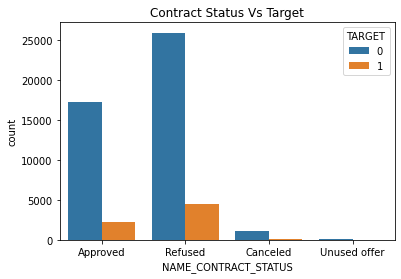

In [174]:
plt.title('Contract Status Vs Target')
sns.countplot(data=df_merged, x='NAME_CONTRACT_STATUS', hue='TARGET')
plt.show()

* Loan has been approved to people with payment difficulties. Also it has been refused to people who donot have payment difficulties.

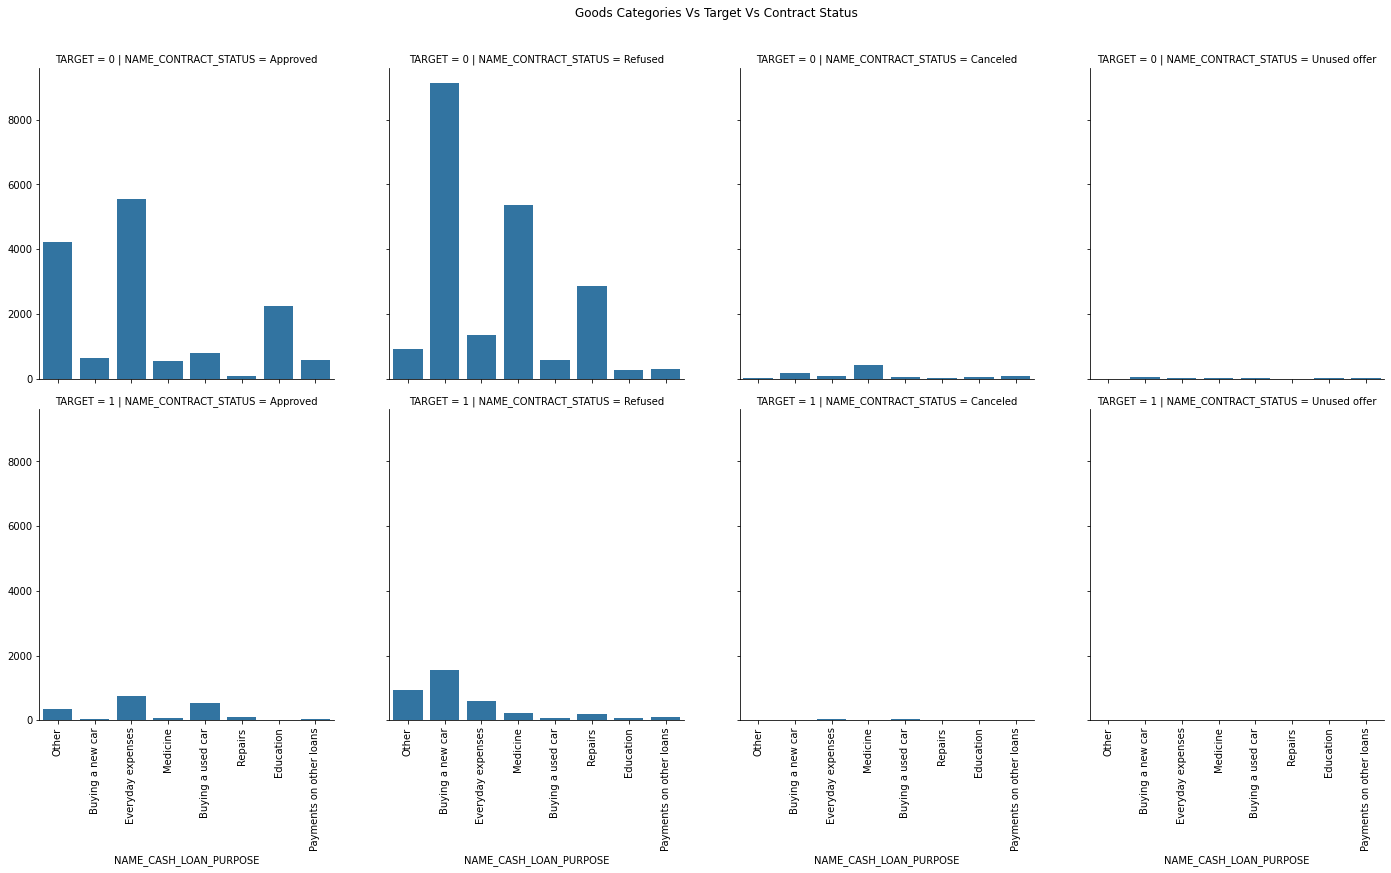

In [175]:
# check Goods Categories Vs Target Vs Contract Status
g = sns.FacetGrid(data=df_merged, col='NAME_CONTRACT_STATUS', row='TARGET', size=5, aspect=1)
g.map(sns.countplot, 'NAME_CASH_LOAN_PURPOSE')
g.fig.suptitle('Goods Categories Vs Target Vs Contract Status', y=1.05)
g.set_xticklabels(rotation=90)
plt.show()

* Buying a car, Medicine and Repairs are top categories where loan applications were rejcted but they applicant doesnot have payment dificulties. Laons for these people can be approved.

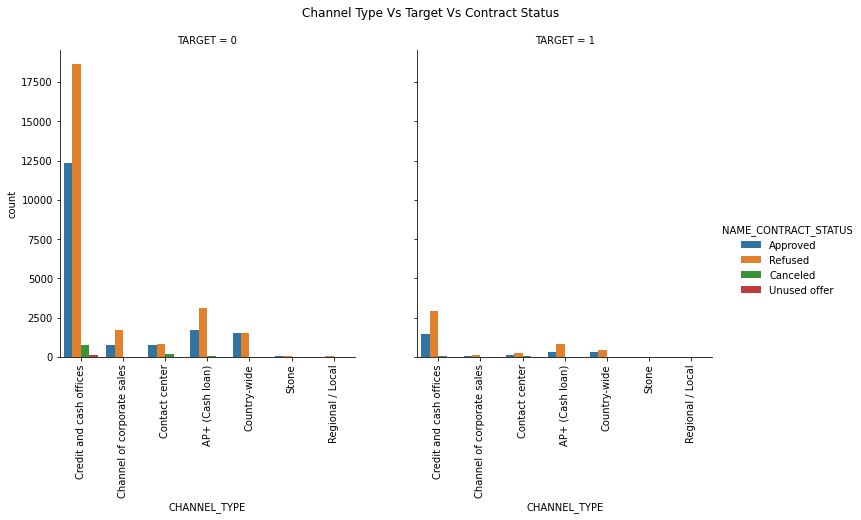

In [176]:
# Check Channel Type Vs Target Vs Contract Status
g = sns.catplot(data=df_merged, x='CHANNEL_TYPE', hue='NAME_CONTRACT_STATUS', kind='count', col='TARGET')
g.set_xticklabels(rotation=90)
g.fig.suptitle('Channel Type Vs Target Vs Contract Status', y=1.05)
plt.show()

* Target 1 data looks fine. It has more rejection as compared to approval.
* Target 0 data also has more rejection specially for Credit&Cash Offices and AP+(Csh loans). These users donot have payment difficulties. Loan can be approved for them.

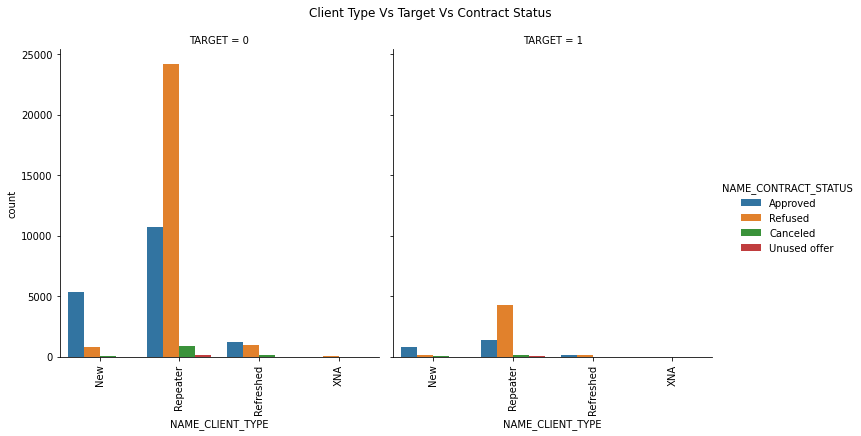

In [177]:
# Check Client Type Vs Target Vs Contract Status
g = sns.catplot(data=df_merged, x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_STATUS', kind='count', col='TARGET')
g.set_xticklabels(rotation=90)
g.fig.suptitle('Client Type Vs Target Vs Contract Status', y=1.05)
plt.show()

* Organization is good in accquiring new clients but retention is poor.
* There are large no of repeater laon applications who donot have payment dificutlies but still their loan application was rejected. Such applications can be approved.


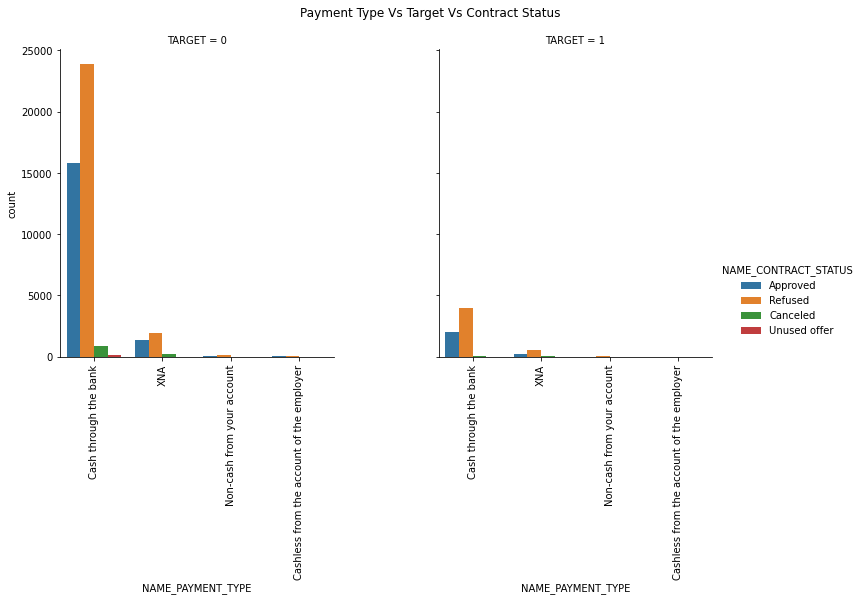

In [178]:
# Check Payment Type Vs Target Vs Contract Status
g = sns.catplot(data=df_merged, x='NAME_PAYMENT_TYPE', hue='NAME_CONTRACT_STATUS', kind='count', col='TARGET')
g.set_xticklabels(rotation=90)
g.fig.suptitle('Payment Type Vs Target Vs Contract Status', y=1.05)
plt.show()

* Large count of loan applications where Cash through the bank was payment method was rejected. They donot have payment difficulties. These applications can be approved. 

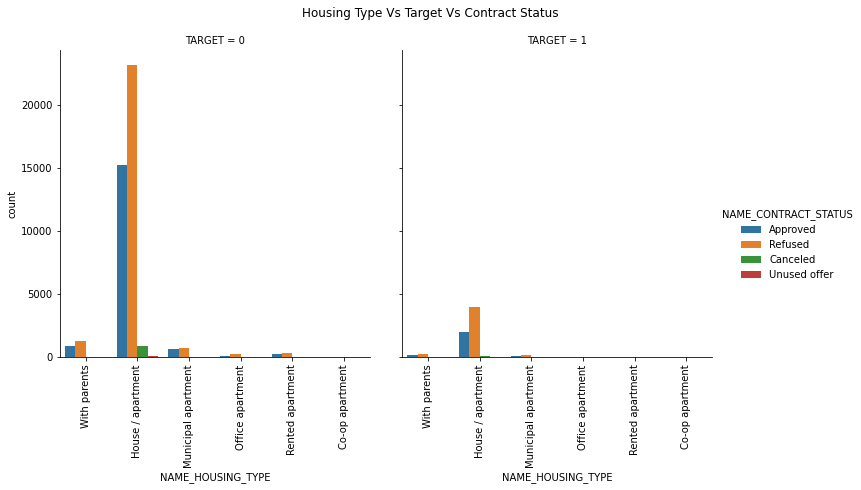

In [179]:
# Check Housing Type Vs Target Vs Contract Status
g = sns.catplot(data=df_merged, x='NAME_HOUSING_TYPE', hue='NAME_CONTRACT_STATUS', kind='count', col='TARGET')
g.set_xticklabels(rotation=90)
g.fig.suptitle('Housing Type Vs Target Vs Contract Status', y=1.05)
plt.show()

* Large count of loan applications for people living in House/Apartment was rejected. They donot have payment difficulties. These applications can be approved. 

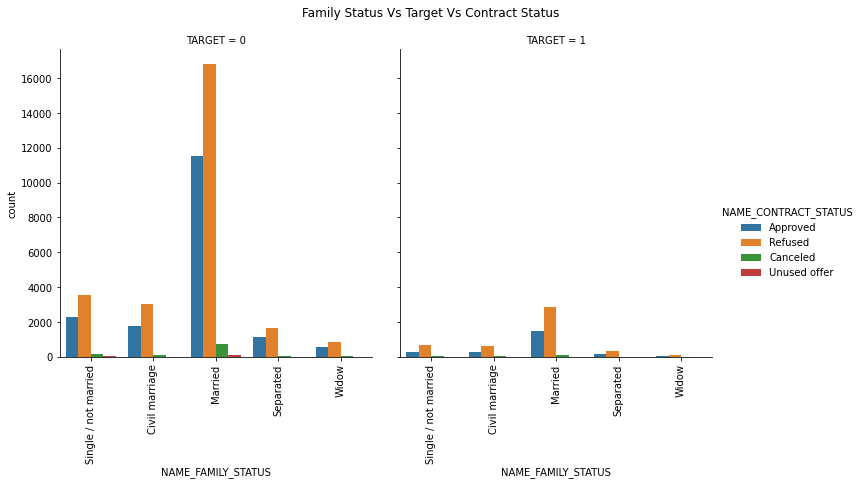

In [180]:
# Check Family Status Vs Target Vs Contract Status
g = sns.catplot(data=df_merged, x='NAME_FAMILY_STATUS', hue='NAME_CONTRACT_STATUS', kind='count', col='TARGET')
g.set_xticklabels(rotation=90)
g.fig.suptitle('Family Status Vs Target Vs Contract Status', y=1.05)
plt.show()

* Loan rejection is high accross all family status. There should be other reason for rejection.

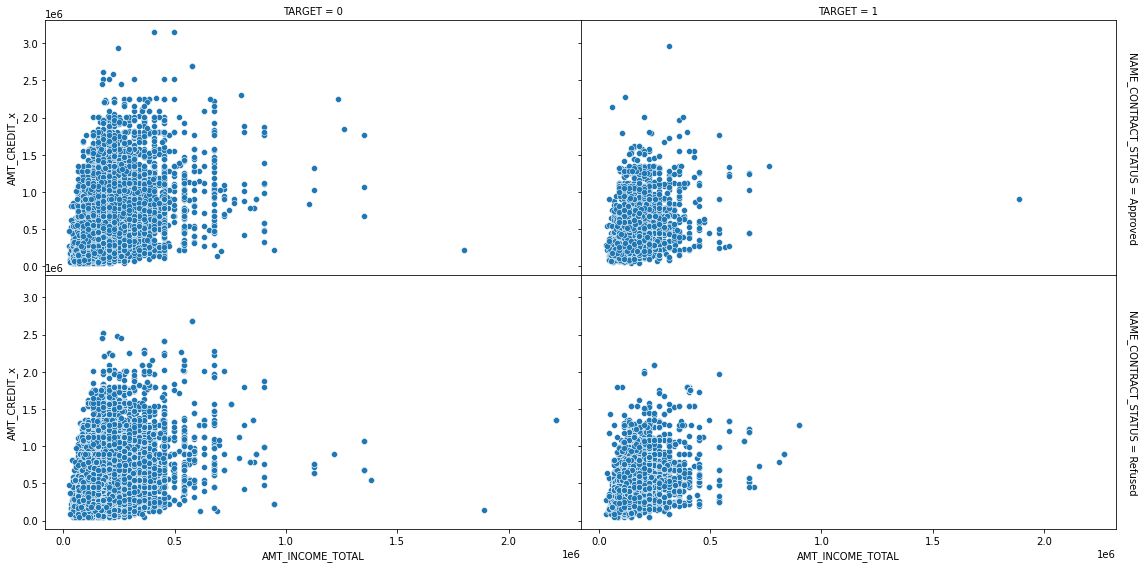

In [181]:
# Check Income Vs credit Vs Target Vs Contract Status
g = sns.FacetGrid(data=df_merged[df_merged.NAME_CONTRACT_STATUS.isin(['Approved', 'Refused'])], 
                  col='TARGET', row='NAME_CONTRACT_STATUS', size=4, aspect=2, margin_titles=True, despine=False,) 
g.map(sns.scatterplot,'AMT_INCOME_TOTAL', 'AMT_CREDIT_x') #, kind='scatter', col='TARGET')
g.fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

* Distribution pattern is same for all 4 boxes. There should be some other driving factor.

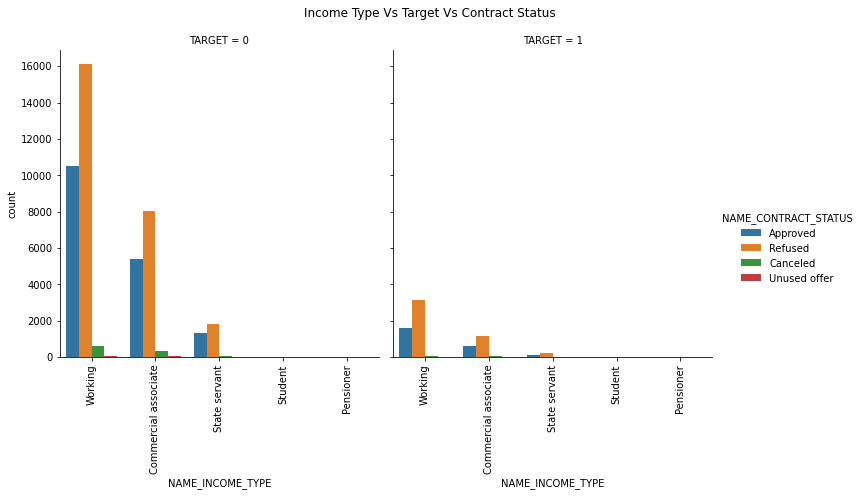

In [182]:
# Check Income Type Vs Target Vs Contract Status
g = sns.catplot(data=df_merged, x='NAME_INCOME_TYPE', hue='NAME_CONTRACT_STATUS', kind='count', col='TARGET')
g.set_xticklabels(rotation=90)
g.fig.suptitle('Income Type Vs Target Vs Contract Status', y=1.05)
plt.show()

* Working income type shows higher count in payment issues. Amount of loan for them can be reduced.

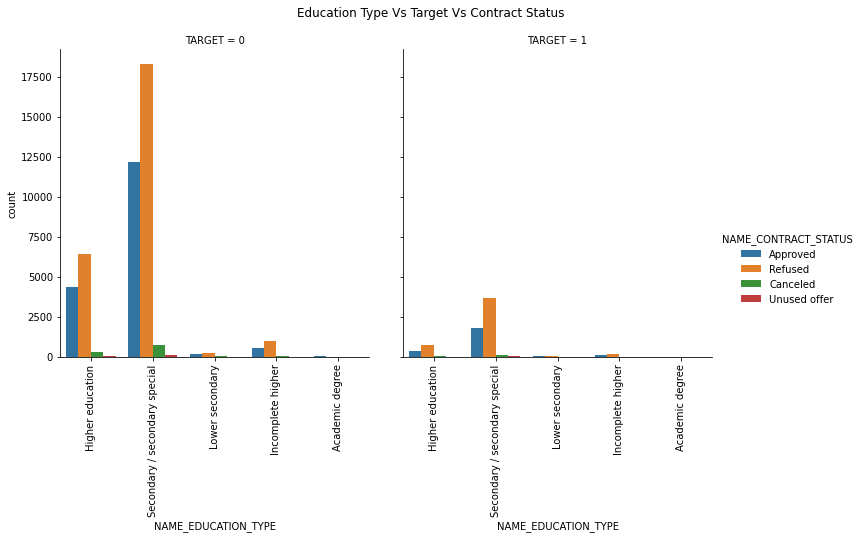

In [183]:
# Check Education Type Vs Target Vs Contract Status
g = sns.catplot(data=df_merged, x='NAME_EDUCATION_TYPE', hue='NAME_CONTRACT_STATUS', kind='count', col='TARGET')
g.set_xticklabels(rotation=90)
g.fig.suptitle('Education Type Vs Target Vs Contract Status', y=1.05)
plt.show()

* Secondary/Secondary Special Education shows higher count in payment issues. Amount of loan for them can be reduced.

### **Conclusion/Recommendation**

Following has been concluded from above analysis
* Approve more loan applications for  
    1. people living in House/Apartment. They donot have payment difficulties.
    2. for Buying a car, Medicine and Repairs are top categories. People requesting loans for these good have less payment issues.
    3. for people where payment type is Cash through the bank.

* Restrict loan for
    1. Secondary/seconday special Education people. They have more payment issues. 
    2. Working income type people. They have more payment issues. 


